# Hill climbing the test set for a classification task

Credits: Jason Brownlee, Machine Learning Mastery blog

In [1]:
# imports
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# load or prepare the classification dataset
def load_dataset():
    return make_classification(n_samples=5000, 
                               n_features=20, 
                               n_informative=15, 
                               n_redundant=5, 
                               random_state=1)

In [3]:
# evaluate a set of predictions
def evaluate_predictions(y_test, yhat):
    return accuracy_score(y_test, yhat)

In [4]:
# create a random set of predictions
def random_predictions(n_examples):
    return [random.randint(0, 1) for _ in range(n_examples)]

In [5]:
# modify the current set of predictions
def modify_predictions(current, n_changes=1):
    # copy current solution
    updated = current.copy()
    for i in range(n_changes):
        # select a point to change
        ix = random.randint(0, len(updated)-1)
        # flip the class label
        updated[ix] = 1 - updated[ix]
    return updated

In [6]:
# run a hill climb for a set of predictions
def hill_climb_testset(X_test, y_test, max_iterations):
    scores = list()
    # generate the initial solution
    solution = random_predictions(X_test.shape[0])
    # evaluate the initial solution
    score = evaluate_predictions(y_test, solution)
    scores.append(score)
    # hill climb to a solution
    for i in range(max_iterations):
        # record scores
        scores.append(score)
        # stop once we achieve the best score
        if score == 1.0:
            break
        # generate new candidate
        candidate = modify_predictions(solution)
        # evaluate candidate
        value = evaluate_predictions(y_test, candidate)
        # check if it is as good or better
        if value >= score:
            solution, score = candidate, value
            print('>%d, score=%.3f' % (i, score))
    return solution, scores

In [7]:
# load the dataset
X, y = load_dataset()
print(X.shape, y.shape)

(5000, 20) (5000,)


In [8]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3350, 20) (1650, 20) (3350,) (1650,)


In [9]:
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 20000)

>0, score=0.501
>4, score=0.502
>5, score=0.502
>10, score=0.503
>11, score=0.504
>12, score=0.504
>13, score=0.505
>16, score=0.505
>17, score=0.506
>18, score=0.507
>19, score=0.507
>20, score=0.508
>21, score=0.508
>24, score=0.509
>26, score=0.510
>28, score=0.510
>29, score=0.511
>31, score=0.512
>32, score=0.512
>35, score=0.513
>43, score=0.513
>44, score=0.514
>46, score=0.515
>50, score=0.515
>54, score=0.516
>56, score=0.516
>58, score=0.517
>61, score=0.518
>64, score=0.518
>69, score=0.519
>70, score=0.519
>73, score=0.520
>78, score=0.521
>80, score=0.521
>83, score=0.522
>86, score=0.522
>88, score=0.523
>90, score=0.524
>92, score=0.524
>93, score=0.525
>94, score=0.525
>97, score=0.526
>99, score=0.527
>100, score=0.527
>101, score=0.528
>102, score=0.528
>104, score=0.529
>108, score=0.530
>109, score=0.530
>110, score=0.531
>113, score=0.532
>114, score=0.532
>117, score=0.533
>118, score=0.533
>120, score=0.534
>121, score=0.535
>123, score=0.535
>124, score=0.536
>1

>1353, score=0.782
>1355, score=0.782
>1372, score=0.783
>1376, score=0.784
>1380, score=0.784
>1382, score=0.785
>1383, score=0.785
>1389, score=0.786
>1393, score=0.787
>1395, score=0.787
>1399, score=0.788
>1412, score=0.788
>1415, score=0.789
>1424, score=0.790
>1425, score=0.790
>1436, score=0.791
>1444, score=0.792
>1446, score=0.792
>1452, score=0.793
>1454, score=0.793
>1455, score=0.794
>1457, score=0.795
>1472, score=0.795
>1474, score=0.796
>1478, score=0.796
>1480, score=0.797
>1484, score=0.798
>1487, score=0.798
>1495, score=0.799
>1497, score=0.799
>1506, score=0.800
>1513, score=0.801
>1520, score=0.801
>1531, score=0.802
>1533, score=0.802
>1535, score=0.803
>1537, score=0.804
>1540, score=0.804
>1552, score=0.805
>1556, score=0.805
>1559, score=0.806
>1565, score=0.807
>1571, score=0.807
>1578, score=0.808
>1584, score=0.808
>1585, score=0.809
>1594, score=0.810
>1601, score=0.810
>1603, score=0.811
>1604, score=0.812
>1606, score=0.812
>1607, score=0.813
>1615, score

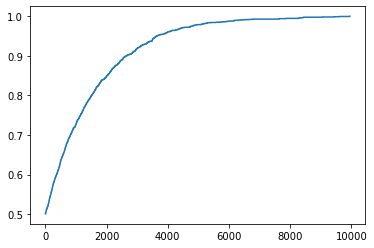

In [10]:
# plot the scores vs iterations
plt.plot(scores)
plt.show()

# Hill climbing the test set for regression - housing dataset

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [12]:
# load or prepare the classification dataset
def load_dataset():
    url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
    df = pd.read_csv(url, header=None)
    data = df.values
    X, y = data[:, :-1], data[:, -1]
    # normalize the target
    scaler = MinMaxScaler()
    y = y.reshape((len(y), 1))
    y = scaler.fit_transform(y)
    return X, y

In [13]:
# evaluate a set of predictions
def evaluate_predictions(y_test, yhat):
    return mean_absolute_error(y_test, yhat)

In [14]:
# create a random set of predictions
def random_predictions(n_examples):
    return [random.random() for _ in range(n_examples)]

In [15]:
# modify the current set of predictions
def modify_predictions(current, n_changes=1):
    # copy current solution
    updated = current.copy()
    for i in range(n_changes):
        # select a point to change
        ix = random.randint(0, len(updated)-1)
        # flip the class label
        updated[ix] = random.random()
    return updated

In [16]:
# run a hill climb for a set of predictions
def hill_climb_testset(X_test, y_test, max_iterations):
    scores = list()
    # generate the initial solution
    solution = random_predictions(X_test.shape[0])
    # evaluate the initial solution
    score = evaluate_predictions(y_test, solution)
    print('>%.3f' % score)
    # hill climb to a solution
    for i in range(max_iterations):
        # record scores
        scores.append(score)
        # stop once we achieve the best score
        if score == 0.0:
            break
        # generate new candidate
        candidate = modify_predictions(solution)
        # evaluate candidate
        value = evaluate_predictions(y_test, candidate)
        # check if it is as good or better
        if value <= score:
            solution, score = candidate, value
            print('>%d, score=%.3f' % (i, score))
    return solution, scores

In [17]:
# load the dataset
X, y = load_dataset()
print(X.shape, y.shape)

(506, 13) (506, 1)


In [18]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339, 1) (167, 1)


In [19]:
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 100000)

>0.293
>2, score=0.292
>4, score=0.291
>6, score=0.290
>7, score=0.289
>11, score=0.288
>13, score=0.285
>15, score=0.284
>16, score=0.283
>17, score=0.283
>19, score=0.282
>23, score=0.281
>24, score=0.279
>26, score=0.278
>27, score=0.274
>28, score=0.273
>31, score=0.271
>34, score=0.270
>36, score=0.269
>37, score=0.269
>38, score=0.267
>40, score=0.264
>42, score=0.264
>43, score=0.263
>44, score=0.262
>46, score=0.261
>47, score=0.260
>48, score=0.257
>52, score=0.254
>53, score=0.250
>54, score=0.250
>57, score=0.249
>63, score=0.247
>65, score=0.246
>70, score=0.244
>71, score=0.242
>72, score=0.242
>74, score=0.239
>80, score=0.238
>81, score=0.235
>83, score=0.232
>94, score=0.232
>96, score=0.231
>99, score=0.228
>102, score=0.227
>105, score=0.225
>107, score=0.225
>113, score=0.224
>114, score=0.222
>118, score=0.220
>124, score=0.220
>125, score=0.217
>126, score=0.217
>132, score=0.217
>134, score=0.215
>135, score=0.214
>137, score=0.213
>138, score=0.211
>143, score=0.

>5309, score=0.015
>5320, score=0.015
>5342, score=0.015
>5378, score=0.015
>5402, score=0.015
>5495, score=0.015
>5497, score=0.015
>5534, score=0.014
>5538, score=0.014
>5544, score=0.014
>5552, score=0.014
>5561, score=0.014
>5596, score=0.014
>5627, score=0.014
>5633, score=0.014
>5662, score=0.014
>5677, score=0.014
>5687, score=0.014
>5707, score=0.014
>5713, score=0.014
>5720, score=0.014
>5744, score=0.013
>5796, score=0.013
>5863, score=0.013
>5869, score=0.013
>5888, score=0.013
>5899, score=0.012
>5914, score=0.012
>6000, score=0.012
>6073, score=0.012
>6133, score=0.012
>6178, score=0.012
>6219, score=0.012
>6243, score=0.012
>6261, score=0.012
>6302, score=0.012
>6344, score=0.012
>6374, score=0.012
>6407, score=0.012
>6474, score=0.012
>6477, score=0.012
>6590, score=0.012
>6600, score=0.012
>6615, score=0.012
>6669, score=0.012
>6717, score=0.011
>6738, score=0.011
>6757, score=0.011
>6781, score=0.011
>6808, score=0.011
>6861, score=0.011
>6882, score=0.011
>6919, score

>70314, score=0.001
>70407, score=0.001
>71037, score=0.001
>71286, score=0.001
>71372, score=0.001
>72813, score=0.001
>73188, score=0.001
>73392, score=0.001
>73671, score=0.001
>74203, score=0.001
>74266, score=0.001
>75160, score=0.001
>77598, score=0.001
>78008, score=0.001
>78372, score=0.001
>78893, score=0.001
>79467, score=0.001
>79756, score=0.001
>80209, score=0.001
>80843, score=0.001
>80850, score=0.001
>80859, score=0.001
>81161, score=0.001
>81835, score=0.001
>81913, score=0.001
>82230, score=0.001
>82315, score=0.001
>83020, score=0.001
>83159, score=0.001
>83653, score=0.001
>84212, score=0.001
>85201, score=0.001
>85561, score=0.001
>85630, score=0.001
>85943, score=0.001
>85952, score=0.001
>87190, score=0.001
>87406, score=0.001
>87698, score=0.001
>88408, score=0.001
>88993, score=0.001
>89666, score=0.001
>89839, score=0.001
>90218, score=0.001
>91603, score=0.001
>91878, score=0.001
>92011, score=0.001
>93596, score=0.001
>93639, score=0.001
>94050, score=0.001


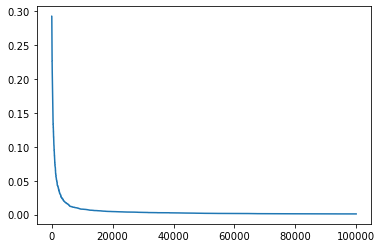

In [20]:
# plot the scores vs iterations
plt.plot(scores)
plt.show()